# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy.stats import skew
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
Book_sell=pd.read_excel(r"C:\Users\Prakash\Downloads\Kaggle_Books-Selling-Records-.csv\Books_Selling_Records-.xlsx")

In [3]:
Book_data=pd.DataFrame(Book_sell)

In [4]:
Book_data.head()

,ID,Customer ID,Purchase-date,Time,Gender,Product-Name,Quantity,Item Price,Shipping-Price,Ship-City,Ship-State,Ship-Postal-Code,Category,Total,Author,Profit (INR),Cost Price
0,1,B07FWXWZT,2018-01-01,08:57:00,Female,Database System Concepts (Int'l Ed),Shipped,999.0,85.0,Hyderabad,Telangana,500073,college,1084.0,Avi Silberschatz,129.87,869.13
1,2,B07FWVXXU,2018-01-02,02:04:00,Male,ESE 2020 Mains Examination: Electrical Enginee...,Shipped,640.0,85.0,DHARMAPURI,TAMIL NADU,636701,competition,725.0,Team of Engineers Academy,108.80,531.20
2,3,B07FWVXZS,2018-01-03,05:08:00,Male,Objective Type Pharmacy,Shipped,715.0,85.0,GUWAHATI,ASSAM,781024,competition,800.0,Dr. mohammed Ali,121.55,593.45
3,4,B07FWYXVQ,2018-01-04,16:06:00,Female,A Text Book of Optics,Shipped,565.0,85.0,Palani,TAMIL NADU,624601,college,650.0,N Subrahmanyam,73.45,491.55
4,5,B07FWXATQ,2018-01-05,20:12:00,Female,Surveying - Vol. 2,Shipped,494.0,85.0,PATNA,BIHAR,800013,college,579.0,DuggalÂ,64.22,429.78


In [5]:
Book_data.shape

(3480, 17)

In [6]:
Book_data.isnull().sum()

ID                  0
Customer ID         0
Purchase-date       0
Time                0
Gender              0
Product-Name        0
Quantity            0
Item Price          0
Shipping-Price      0
Ship-City           0
Ship-State          0
Ship-Postal-Code    0
Category            0
Total               0
Author              0
Profit (INR)        0
Cost Price          0
dtype: int64

In [7]:
Book_data.describe()

,ID,Purchase-date,Item Price,Shipping-Price,Ship-Postal-Code,Total,Profit (INR),Cost Price
count,3480.000000,3480,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000
mean,1740.500000,2022-10-06 11:59:59.999999744,377.747641,79.029230,420589.916379,456.776871,59.810108,317.937532
min,1.000000,2018-01-01 00:00:00,40.000000,0.000000,110001.000000,80.000000,5.200000,34.800000
25%,870.750000,2020-05-19 18:00:00,155.000000,67.000000,248007.000000,231.450000,27.900000,127.100000
50%,1740.500000,2022-10-06 12:00:00,285.000000,79.000000,401501.000000,340.000000,45.000000,233.700000
75%,2610.250000,2025-02-22 06:00:00,550.000000,89.000000,560087.000000,639.000000,77.350000,472.410000
max,3480.000000,2027-07-12 00:00:00,6450.000000,850.000000,855107.000000,7300.000000,838.500000,5611.500000
std,1004.733796,NaN,327.258570,27.332728,204002.505467,338.977701,47.708602,280.863478


In [8]:
Book_data.dtypes

ID                           int64
Customer ID                 object
Purchase-date       datetime64[ns]
Time                        object
Gender                      object
Product-Name                object
Quantity                    object
Item Price                 float64
Shipping-Price             float64
Ship-City                   object
Ship-State                  object
Ship-Postal-Code             int64
Category                    object
Total                      float64
Author                      object
Profit (INR)               float64
Cost Price                 float64
dtype: object

In [9]:
book_num=Book_data.select_dtypes(['int64','float64']);book_num.head()

,ID,Item Price,Shipping-Price,Ship-Postal-Code,Total,Profit (INR),Cost Price
0,1,999.0,85.0,500073,1084.0,129.87,869.13
1,2,640.0,85.0,636701,725.0,108.80,531.20
2,3,715.0,85.0,781024,800.0,121.55,593.45
3,4,565.0,85.0,624601,650.0,73.45,491.55
4,5,494.0,85.0,800013,579.0,64.22,429.78


<Axes: >

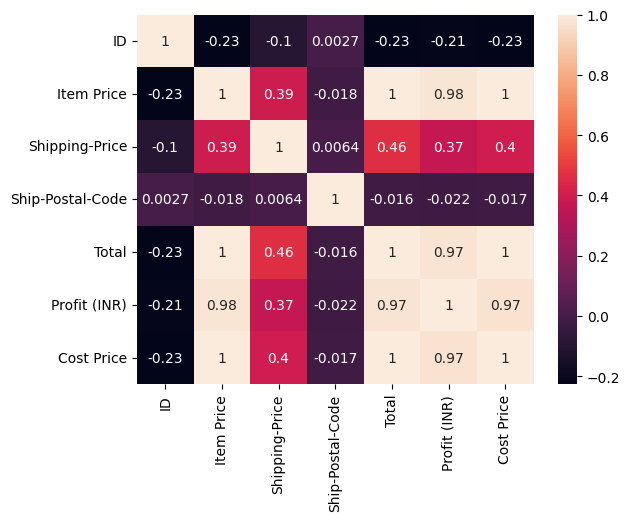

In [10]:
sns.heatmap(book_num.corr(),annot=True)

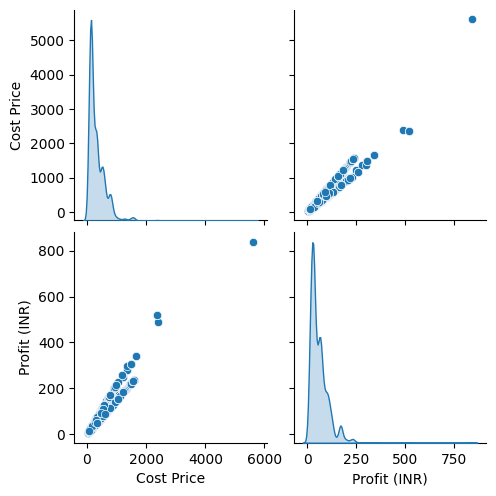

In [11]:
sns.pairplot(Book_data[['Cost Price','Profit (INR)']],diag_kind="kde")

In [12]:
X=Book_data.loc[:,['Cost Price']]
Y=Book_data.loc[:,['Profit (INR)']]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [14]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
Y_train=np.array(Y_train).reshape(-1,1)
Y_test=np.array(Y_test).reshape(-1,1)

Train Data

In [15]:
reg=LinearRegression().fit(X_train,Y_train)

In [16]:
reg.score(X_train,Y_train)
reg.coef_
reg.intercept_
Y_predict=reg.predict(X_train)

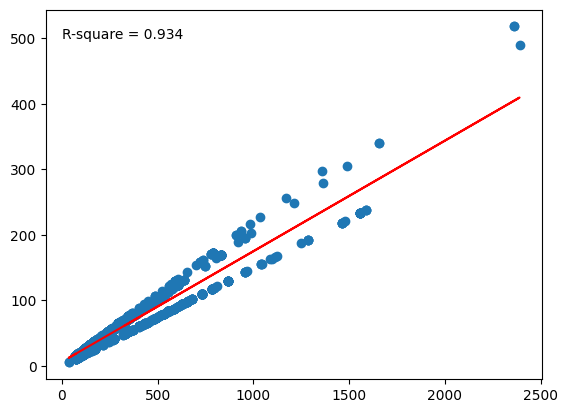

In [17]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_predict,color="red")
plt.annotate("R-square = {:.3f}".format(r2_score(Y_train, Y_predict)), (0, 500))
plt.show()

Test Data

In [18]:
reg_test=LinearRegression().fit(X_test,Y_test)

In [19]:
reg_test.score(X_test,Y_test)
reg_test.coef_
reg_test.intercept_
Y_pred=reg_test.predict(X_test)

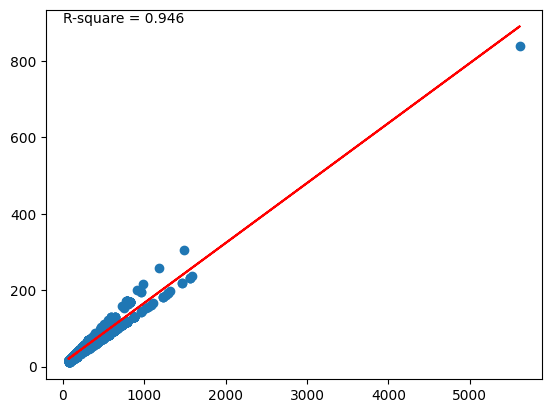

In [20]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color="red")
plt.annotate("R-square = {:.3f}".format(r2_score(Y_test, Y_pred)), (0,900))
plt.show()

# Decision Tree 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [22]:
Book_sell=pd.read_excel(r"C:\Users\Prakash\Downloads\Kaggle_Books-Selling-Records-.csv\Books_Selling_Records2-.xlsx")

In [23]:
Book_data=pd.DataFrame(Book_sell)

In [24]:
Book_data.head()
Book_data.describe()
Book_data.isnull().sum()

Item Price        0
Shipping-Price    0
Total             0
Gender            0
Cost Price        0
Profit (INR)      0
dtype: int64

<Axes: >

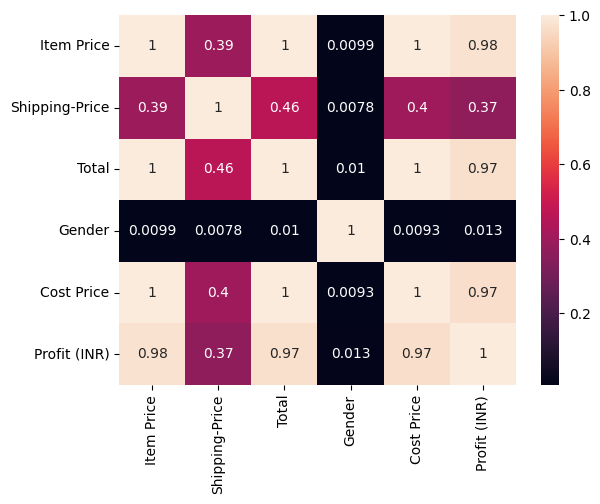

In [25]:
sns.heatmap(Book_data.corr(),annot=True)

In [26]:
X=Book_data.iloc[:100,:5]
Y=Book_data.iloc[:100,-1]

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
l=[]
for i in range(1,10):
    tree_model=DecisionTreeRegressor(max_depth=i)
    tree_model.fit(X_train,Y_train)
    y_pred=tree_model.predict(X_test)
    l.append(mean_squared_error(Y_test,y_pred))
print(l.index(min(l)))
print(min(l))

4
59.92089406378603


In [30]:
l

[370.35931420654936,
 212.87720947716812,
 119.3412297129484,
 89.94060434975223,
 59.92089406378603,
 146.62174,
 180.56472,
 157.3982801234568,
 81.65130333333332]

[Text(0.4767857142857143, 0.9375, 'Cost Price <= 492.7\nsquared_error = 1200.508\nsamples = 70\nvalue = 101.597'),
 Text(0.15714285714285714, 0.8125, 'Cost Price <= 292.775\nsquared_error = 168.329\nsamples = 23\nvalue = 62.592'),
 Text(0.08571428571428572, 0.6875, 'Cost Price <= 190.9\nsquared_error = 36.767\nsamples = 3\nvalue = 35.983'),
 Text(0.05714285714285714, 0.5625, 'Item Price <= 187.5\nsquared_error = 4.516\nsamples = 2\nvalue = 31.875'),
 Text(0.02857142857142857, 0.4375, 'squared_error = 0.0\nsamples = 1\nvalue = 29.75'),
 Text(0.08571428571428572, 0.4375, 'squared_error = 0.0\nsamples = 1\nvalue = 34.0'),
 Text(0.11428571428571428, 0.5625, 'squared_error = 0.0\nsamples = 1\nvalue = 44.2'),
 Text(0.22857142857142856, 0.6875, 'Total <= 577.0\nsquared_error = 65.931\nsamples = 20\nvalue = 66.583'),
 Text(0.17142857142857143, 0.5625, 'Cost Price <= 387.15\nsquared_error = 7.098\nsamples = 10\nvalue = 59.15'),
 Text(0.14285714285714285, 0.4375, 'squared_error = 0.0\nsamples = 

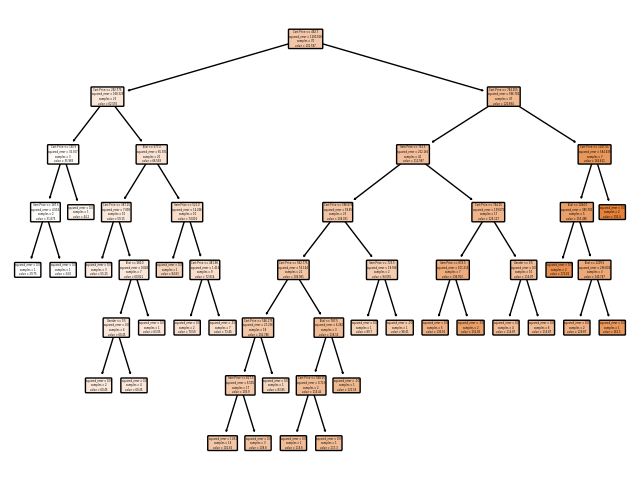

In [31]:

tree_model=DecisionTreeRegressor(max_depth=7)
tree_model=tree_model.fit(X_train,Y_train)
y_pred=tree_model.predict(X_test)
plt.figure(figsize=(8,6))
plot_tree(tree_model,filled=True,rounded=True,class_names=['Profit','No Profit'],feature_names=X.columns)

In [32]:
accuracy_score=tree_model.score(X_train,Y_train)
print(accuracy_score)

0.9997248783492707


In [33]:
accuracy_score=tree_model.score(X_test,Y_test)
print(accuracy_score)

0.8375458146516247


# Random Forest

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [35]:
Book_sell=pd.read_excel(r"C:\Users\Prakash\Downloads\Kaggle_Books-Selling-Records-.csv\Books_Selling_Records2-.xlsx")

In [36]:
Book_data=pd.DataFrame(Book_sell)

In [37]:
Book_data.head()
Book_data.describe()
Book_data.isnull().sum()

Item Price        0
Shipping-Price    0
Total             0
Gender            0
Cost Price        0
Profit (INR)      0
dtype: int64

In [38]:
Book_data.dtypes

Item Price        float64
Shipping-Price    float64
Total             float64
Gender              int64
Cost Price        float64
Profit (INR)      float64
dtype: object

In [39]:
X=Book_data.loc[:,["Cost Price","Total"]].values
Y=Book_data.loc[:,"Profit (INR)"].values

In [40]:
import sklearn
print(sklearn.__version__)

1.3.2


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [43]:
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)

In [44]:
X,Y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [45]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,Y_train)
regr

RandomForestRegressor(max_depth=2, random_state=0)

In [46]:
y_pred= regr.predict(X_test)
y_pred

array([ 26.77544279, 179.47264847,  26.77544279, ...,  26.77544279,
       102.58320366,  26.77544279])

In [47]:
accuracy_score=regr.score(X_train,Y_train)
print(accuracy_score)

0.8689877148439151


In [48]:
accuracy_score=regr.score(X_test,Y_test)
print(accuracy_score)

0.7528974439708955
